# Mohammed Hajo
# 301155309

In [68]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow import keras
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [12]:
# Loading images
images, target = fetch_olivetti_faces(return_X_y=True)

In [64]:
## preserving 99% of the variance to reduce the dataset’s dimensionality using PCA
pca = PCA(0.99)
red_images = pca.fit_transform(images)

In [65]:
## Splitting training, validation ,and test sets with ratio: 60%, 20% and 20%
## Training set is the majority in order to train the model with more data

## Firstly we split the 20% test set
sss = StratifiedShuffleSplit(test_size=0.2, random_state=0)
for data_index, test_index in sss.split(red_images, target):
     x, x_test = red_images[data_index], red_images[test_index]
     y, y_test = target[data_index], target[test_index]

## Then splitting the 20% validation set (note: to get the 20% from the total set, we use 25% of the remaining set
## after split the test set previously)
sss1 = StratifiedShuffleSplit(test_size=0.25, random_state=0)
for train_index, val_index in sss1.split(x, y):
     x_train, x_val = x[train_index], x[val_index]
     y_train, y_val = y[train_index], y[val_index]

In [35]:
# defining the autoencoder builder method
def build_model(n_neurons=100, learning_rate=3e-3, input_shape=[3072]):
    stacked_encoder = keras.models.Sequential([
        keras.layers.Input(shape=(260,)),
        keras.layers.Dense(n_neurons, activation="selu"),
        keras.layers.Dense(30, activation="selu"),
    ])
    
    stacked_decoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[30]),
        keras.layers.Dense(260, activation="sigmoid"),
    ])
    
    model = keras.models.Sequential([stacked_encoder, stacked_decoder])
    optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=0.9, nesterov=True)
    model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    return model

In [36]:
# using keras wrapper in order to use the model in RandomizedSearchCV
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [37]:
# define the parameters
param_distribs = {
    "n_neurons": [50, 100, 150],
    "learning_rate": reciprocal(3e-4, 3e-2),
    "batch_size": [10, 20, 32]
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)

# Fitting the RandomizedSearchCV
rnd_search_cv.fit(x_train, y_train, epochs=100,
                  validation_data=(x_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 5.4919 - accuracy: 0.0125 - val_loss: 5.1262 - val_accuracy: 0.0500
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 4.5154 - accuracy: 0.2562 - val_loss: 4.1923 - val_accuracy: 0.2750
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 3.1479 - accuracy: 0.5063 - val_loss: 3.0739 - val_accuracy: 0.3375
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 1.8950 - accuracy: 0.6687 - val_loss: 2.2464 - val_accuracy: 0.5375
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0947 - accuracy: 0.7937 - val_loss: 1.7193 - val_accuracy: 0.6000
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6123 - accuracy: 0.9125 - val_loss: 1.3546 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3372 - accuracy: 0.9625 - val_loss: 1.1810 - val_accuracy: 0.7250
Epoch 8/100
8/8 [=========

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 19ms/step - loss: 5.5133 - accuracy: 0.0125 - val_loss: 5.0516 - val_accuracy: 0.1125
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 4.3845 - accuracy: 0.3125 - val_loss: 4.0922 - val_accuracy: 0.3250
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 2.9602 - accuracy: 0.5500 - val_loss: 3.0610 - val_accuracy: 0.4000
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 1.7260 - accuracy: 0.7063 - val_loss: 2.2788 - val_accuracy: 0.5250
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0324 - accuracy: 0.7812 - val_loss: 1.7166 - val_accuracy: 0.5750
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5684 - accuracy: 0.9125 - val_loss: 1.3841 - val_accuracy: 0.7000
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3401 - accuracy: 0.9563 - val_loss: 1.1788 - val_accuracy: 0.7125
Epoch 8/100
8/8 [=====================

8/8 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.6909 - val_accuracy: 0.8000
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.6904 - val_accuracy: 0.8000
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.6897 - val_accuracy: 0.8000
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.6891 - val_accuracy: 0.8000
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6889 - val_accuracy: 0.8000
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6884 - val_accuracy: 0.8000
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.6881 - val_accuracy: 0.8000
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 21ms/step - loss: 5.5029 - accuracy: 0.0312 - val_loss: 5.0436 - val_accuracy: 0.0875
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 4.5759 - accuracy: 0.2500 - val_loss: 4.1834 - val_accuracy: 0.2125
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 3.3585 - accuracy: 0.4437 - val_loss: 3.2206 - val_accuracy: 0.3375
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 2.1409 - accuracy: 0.6438 - val_loss: 2.3745 - val_accuracy: 0.4750
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 1.2655 - accuracy: 0.7812 - val_loss: 1.7658 - val_accuracy: 0.5500
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.8938 - val_loss: 1.3786 - val_accuracy: 0.6250
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3969 - accuracy: 0.9625 - val_loss: 1.1359 - val_accuracy: 0.7500
Epoch 8/100
8/8 [=====================

8/8 [==============================] - 0s 5ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.5592 - val_accuracy: 0.8500
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.5587 - val_accuracy: 0.8500
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.5582 - val_accuracy: 0.8500
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5573 - val_accuracy: 0.8500
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.5566 - val_accuracy: 0.8500
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.5561 - val_accuracy: 0.8500
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.5556 - val_accuracy: 0.8500
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 20ms/step - loss: 5.7586 - accuracy: 0.0000e+00 - val_loss: 5.8083 - val_accuracy: 0.0125
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 5.7224 - accuracy: 0.0000e+00 - val_loss: 5.7748 - val_accuracy: 0.0125
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 5.6752 - accuracy: 0.0000e+00 - val_loss: 5.7344 - val_accuracy: 0.0125
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 5.6198 - accuracy: 0.0000e+00 - val_loss: 5.6916 - val_accuracy: 0.0125
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 5.5637 - accuracy: 0.0000e+00 - val_loss: 5.6491 - val_accuracy: 0.0125
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 5.5090 - accuracy: 0.0000e+00 - val_loss: 5.6064 - val_accuracy: 0.0125
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 5.4534 - accuracy: 0.0125 - val_loss: 5.5649 - val_accuracy: 0.0125
Epoch 8/100
8/

8/8 [==============================] - 0s 4ms/step - loss: 2.7337 - accuracy: 0.5938 - val_loss: 3.4446 - val_accuracy: 0.3875
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 2.6852 - accuracy: 0.5938 - val_loss: 3.4070 - val_accuracy: 0.3875
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 2.6370 - accuracy: 0.5938 - val_loss: 3.3702 - val_accuracy: 0.3875
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5901 - accuracy: 0.6000 - val_loss: 3.3336 - val_accuracy: 0.4000
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 2.5435 - accuracy: 0.6000 - val_loss: 3.2971 - val_accuracy: 0.4000
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4980 - accuracy: 0.6062 - val_loss: 3.2615 - val_accuracy: 0.4000
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 2.4546 - accuracy: 0.6125 - val_loss: 3.2256 - val_accuracy: 0.4125
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 17ms/step - loss: 5.6382 - accuracy: 0.0000e+00 - val_loss: 5.6713 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 5.6036 - accuracy: 0.0000e+00 - val_loss: 5.6383 - val_accuracy: 0.0125
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 5.5572 - accuracy: 0.0000e+00 - val_loss: 5.5995 - val_accuracy: 0.0125
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 5.5044 - accuracy: 0.0063 - val_loss: 5.5574 - val_accuracy: 0.0125
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 5.4507 - accuracy: 0.0125 - val_loss: 5.5146 - val_accuracy: 0.0125
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 5.3964 - accuracy: 0.0188 - val_loss: 5.4716 - val_accuracy: 0.0125
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 5.3401 - accuracy: 0.0188 - val_loss: 5.4297 - val_accuracy: 0.0125
Epoch 8/100
8/8 [=====

8/8 [==============================] - 0s 4ms/step - loss: 2.4308 - accuracy: 0.6250 - val_loss: 3.2517 - val_accuracy: 0.3625
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3833 - accuracy: 0.6250 - val_loss: 3.2151 - val_accuracy: 0.3625
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 2.3373 - accuracy: 0.6375 - val_loss: 3.1794 - val_accuracy: 0.3625
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2906 - accuracy: 0.6438 - val_loss: 3.1445 - val_accuracy: 0.3750
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2466 - accuracy: 0.6625 - val_loss: 3.1092 - val_accuracy: 0.3750
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 2.2028 - accuracy: 0.6625 - val_loss: 3.0752 - val_accuracy: 0.3625
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 2.1586 - accuracy: 0.6625 - val_loss: 3.0420 - val_accuracy: 0.3750
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 18ms/step - loss: 5.7067 - accuracy: 0.0000e+00 - val_loss: 5.6432 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 5.6749 - accuracy: 0.0000e+00 - val_loss: 5.6145 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 5.6319 - accuracy: 0.0000e+00 - val_loss: 5.5805 - val_accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 5.5846 - accuracy: 0.0000e+00 - val_loss: 5.5445 - val_accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 5.5350 - accuracy: 0.0125 - val_loss: 5.5082 - val_accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 5.4859 - accuracy: 0.0125 - val_loss: 5.4721 - val_accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 5.4372 - accuracy: 0.0188 - val_loss: 5.4361 - val_accuracy: 0.000

8/8 [==============================] - 0s 4ms/step - loss: 2.9511 - accuracy: 0.5813 - val_loss: 3.5238 - val_accuracy: 0.4625
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 2.9034 - accuracy: 0.5813 - val_loss: 3.4856 - val_accuracy: 0.4750
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 2.8560 - accuracy: 0.5875 - val_loss: 3.4473 - val_accuracy: 0.4750
Epoch 62/100
8/8 [==============================] - 0s 4ms/step - loss: 2.8092 - accuracy: 0.5875 - val_loss: 3.4088 - val_accuracy: 0.4625
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 2.7617 - accuracy: 0.5938 - val_loss: 3.3709 - val_accuracy: 0.4625
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 2.7146 - accuracy: 0.5938 - val_loss: 3.3338 - val_accuracy: 0.4625
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 2.6680 - accuracy: 0.6062 - val_loss: 3.2962 - val_accuracy: 0.4625
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 17ms/step - loss: 5.6260 - accuracy: 0.0000e+00 - val_loss: 5.6198 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 5.5651 - accuracy: 0.0000e+00 - val_loss: 5.5609 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 5.4820 - accuracy: 0.0000e+00 - val_loss: 5.4915 - val_accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 5.3871 - accuracy: 0.0063 - val_loss: 5.4192 - val_accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 5.2888 - accuracy: 0.0250 - val_loss: 5.3447 - val_accuracy: 0.0125
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 5.1943 - accuracy: 0.0375 - val_loss: 5.2688 - val_accuracy: 0.0500
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 5.0965 - accuracy: 0.0562 - val_loss: 5.1945 - val_accuracy: 0.0625
Epoch 8/10

8/8 [==============================] - 0s 5ms/step - loss: 1.1193 - accuracy: 0.8687 - val_loss: 2.0566 - val_accuracy: 0.6250
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0870 - accuracy: 0.8813 - val_loss: 2.0271 - val_accuracy: 0.6250
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0560 - accuracy: 0.8813 - val_loss: 1.9982 - val_accuracy: 0.6250
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0262 - accuracy: 0.8813 - val_loss: 1.9697 - val_accuracy: 0.6375
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9962 - accuracy: 0.8875 - val_loss: 1.9427 - val_accuracy: 0.6375
Epoch 64/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9683 - accuracy: 0.9000 - val_loss: 1.9154 - val_accuracy: 0.6375
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9407 - accuracy: 0.9000 - val_loss: 1.8900 - val_accuracy: 0.6375
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 17ms/step - loss: 5.6582 - accuracy: 0.0063 - val_loss: 5.6529 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 5.5916 - accuracy: 0.0063 - val_loss: 5.5918 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 5.4976 - accuracy: 0.0125 - val_loss: 5.5203 - val_accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 5.3990 - accuracy: 0.0312 - val_loss: 5.4475 - val_accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 5.2971 - accuracy: 0.0500 - val_loss: 5.3758 - val_accuracy: 0.0375
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 5.1981 - accuracy: 0.0688 - val_loss: 5.3063 - val_accuracy: 0.0375
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 5.1027 - accuracy: 0.1063 - val_loss: 5.2385 - val_accuracy: 0.0500
Epoch 8/100
8/8 [=====

8/8 [==============================] - 0s 5ms/step - loss: 1.0078 - accuracy: 0.8562 - val_loss: 2.0697 - val_accuracy: 0.5750
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9747 - accuracy: 0.8687 - val_loss: 2.0379 - val_accuracy: 0.6000
Epoch 61/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9416 - accuracy: 0.8875 - val_loss: 2.0078 - val_accuracy: 0.6000
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9115 - accuracy: 0.8938 - val_loss: 1.9783 - val_accuracy: 0.6125
Epoch 63/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8815 - accuracy: 0.8938 - val_loss: 1.9500 - val_accuracy: 0.6250
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8541 - accuracy: 0.9000 - val_loss: 1.9217 - val_accuracy: 0.6250
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8257 - accuracy: 0.9000 - val_loss: 1.8945 - val_accuracy: 0.6375
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


8/8 [==============================] - 0s 18ms/step - loss: 5.7453 - accuracy: 0.0000e+00 - val_loss: 5.7189 - val_accuracy: 0.0000e+00
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 5.6839 - accuracy: 0.0000e+00 - val_loss: 5.6620 - val_accuracy: 0.0000e+00
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 5.5981 - accuracy: 0.0000e+00 - val_loss: 5.5937 - val_accuracy: 0.0000e+00
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 5.5045 - accuracy: 0.0000e+00 - val_loss: 5.5232 - val_accuracy: 0.0000e+00
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 5.4060 - accuracy: 0.0063 - val_loss: 5.4531 - val_accuracy: 0.0000e+00
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 5.3093 - accuracy: 0.0250 - val_loss: 5.3828 - val_accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 5.2142 - accuracy: 0.0312 - val_loss: 5.3126 - val_accuracy: 0.000

8/8 [==============================] - 0s 5ms/step - loss: 1.0834 - accuracy: 0.8875 - val_loss: 2.0785 - val_accuracy: 0.6000
Epoch 60/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0456 - accuracy: 0.8875 - val_loss: 2.0451 - val_accuracy: 0.6000
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 1.0090 - accuracy: 0.8875 - val_loss: 2.0130 - val_accuracy: 0.6000
Epoch 62/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9748 - accuracy: 0.8875 - val_loss: 1.9819 - val_accuracy: 0.6000
Epoch 63/100
8/8 [==============================] - 0s 4ms/step - loss: 0.9419 - accuracy: 0.8938 - val_loss: 1.9529 - val_accuracy: 0.6000
Epoch 64/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9098 - accuracy: 0.8938 - val_loss: 1.9250 - val_accuracy: 0.6000
Epoch 65/100
8/8 [==============================] - 0s 5ms/step - loss: 0.8805 - accuracy: 0.8938 - val_loss: 1.8955 - val_accuracy: 0.6125
Epoch 66/100
8/8 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 9ms/step - loss: 5.6204 - accuracy: 0.0000e+00 - val_loss: 5.5106 - val_accuracy: 0.0125
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 5.1996 - accuracy: 0.0875 - val_loss: 5.1360 - val_accuracy: 0.1250
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4.7290 - accuracy: 0.1750 - val_loss: 4.7682 - val_accuracy: 0.2250
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 4.2555 - accuracy: 0.3812 - val_loss: 4.3659 - val_accuracy: 0.3250
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 3.7384 - accuracy: 0.4875 - val_loss: 3.9615 - val_accuracy: 0.3750
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 3.2215 - accuracy: 0.5437 - val_loss: 3.5563 - val_accuracy: 0.4375
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 2.7404 - accuracy: 0.5562 - val_loss: 3.2107 - val_accuracy: 0.4500
Epoch 8/100
16/16 [==

16/16 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.8448 - val_accuracy: 0.7875
Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 1.0000 - val_loss: 0.8428 - val_accuracy: 0.7875
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.8411 - val_accuracy: 0.7875
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 1.0000 - val_loss: 0.8395 - val_accuracy: 0.7875
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 0.8367 - val_accuracy: 0.7875
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 1.0000 - val_loss: 0.8359 - val_accuracy: 0.7875
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 1.0000 - val_loss: 0.8345 - val_accuracy: 0.7875
Epoch 65/100
16/16 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 9ms/step - loss: 5.6027 - accuracy: 0.0063 - val_loss: 5.4005 - val_accuracy: 0.0125
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 5.2118 - accuracy: 0.0500 - val_loss: 5.0873 - val_accuracy: 0.0750
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4.7679 - accuracy: 0.1750 - val_loss: 4.7480 - val_accuracy: 0.2125
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 4.3137 - accuracy: 0.4000 - val_loss: 4.4021 - val_accuracy: 0.3250
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 3.8289 - accuracy: 0.5312 - val_loss: 4.0197 - val_accuracy: 0.4375
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 3.3112 - accuracy: 0.6313 - val_loss: 3.6199 - val_accuracy: 0.4625
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 2.7988 - accuracy: 0.7000 - val_loss: 3.2531 - val_accuracy: 0.4750
Epoch 8/100
16/16 [======

Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.9163 - val_accuracy: 0.7875
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 1.0000 - val_loss: 0.9150 - val_accuracy: 0.7875
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 1.0000 - val_loss: 0.9128 - val_accuracy: 0.7875
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.9125 - val_accuracy: 0.7875
Epoch 63/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.9112 - val_accuracy: 0.7875
Epoch 64/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0275 - accuracy: 1.0000 - val_loss: 0.9093 - val_accuracy: 0.7875
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 1.0000 - val_loss: 0.9080 - val_accuracy: 0.7875
Epoch 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 9ms/step - loss: 5.5769 - accuracy: 0.0000e+00 - val_loss: 5.3812 - val_accuracy: 0.0250
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 5.1865 - accuracy: 0.0750 - val_loss: 5.0523 - val_accuracy: 0.0750
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4.7167 - accuracy: 0.2062 - val_loss: 4.7095 - val_accuracy: 0.1750
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 4.2474 - accuracy: 0.3438 - val_loss: 4.3566 - val_accuracy: 0.2625
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 3.7560 - accuracy: 0.4875 - val_loss: 3.9840 - val_accuracy: 0.2875
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 3.2617 - accuracy: 0.5688 - val_loss: 3.6003 - val_accuracy: 0.3500
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 2.7744 - accuracy: 0.5813 - val_loss: 3.2437 - val_accuracy: 0.4125
Epoch 8/100
16/16 [==

Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 0.7234 - val_accuracy: 0.8625
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 0.7206 - val_accuracy: 0.8625
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 0.7187 - val_accuracy: 0.8625
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 0.7179 - val_accuracy: 0.8625
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 0.7161 - val_accuracy: 0.8625
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 0.7136 - val_accuracy: 0.8625
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.7123 - val_accuracy: 0.8625
Epoch 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 36ms/step - loss: 5.6028 - accuracy: 0.0000e+00 - val_loss: 5.6248 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 5.4751 - accuracy: 0.0125 - val_loss: 5.4883 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 5.2815 - accuracy: 0.0375 - val_loss: 5.3238 - val_accuracy: 0.0125
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 5.0720 - accuracy: 0.0688 - val_loss: 5.1465 - val_accuracy: 0.0125
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 4.8465 - accuracy: 0.1312 - val_loss: 4.9629 - val_accuracy: 0.0250
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 4.6236 - accuracy: 0.1813 - val_loss: 4.7711 - val_accuracy: 0.1000
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 4.3847 - accuracy: 0.2937 - val_loss: 4.5717 - val_accuracy: 0.1500
Epoch 8/100
5/5 [=========

5/5 [==============================] - 0s 7ms/step - loss: 0.1374 - accuracy: 1.0000 - val_loss: 0.9766 - val_accuracy: 0.7500
Epoch 60/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1326 - accuracy: 1.0000 - val_loss: 0.9710 - val_accuracy: 0.7500
Epoch 61/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1282 - accuracy: 1.0000 - val_loss: 0.9645 - val_accuracy: 0.7500
Epoch 62/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1241 - accuracy: 1.0000 - val_loss: 0.9592 - val_accuracy: 0.7500
Epoch 63/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1201 - accuracy: 1.0000 - val_loss: 0.9538 - val_accuracy: 0.7500
Epoch 64/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1163 - accuracy: 1.0000 - val_loss: 0.9486 - val_accuracy: 0.7500
Epoch 65/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1129 - accuracy: 1.0000 - val_loss: 0.9441 - val_accuracy: 0.7500
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 33ms/step - loss: 5.6513 - accuracy: 0.0000e+00 - val_loss: 5.6773 - val_accuracy: 0.0125
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5365 - accuracy: 0.0250 - val_loss: 5.5640 - val_accuracy: 0.0250
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 5.3731 - accuracy: 0.0437 - val_loss: 5.4247 - val_accuracy: 0.0375
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 5.1846 - accuracy: 0.0875 - val_loss: 5.2752 - val_accuracy: 0.0750
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 4.9793 - accuracy: 0.1500 - val_loss: 5.1230 - val_accuracy: 0.0875
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 4.7763 - accuracy: 0.2250 - val_loss: 4.9643 - val_accuracy: 0.1375
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 4.5581 - accuracy: 0.2688 - val_loss: 4.8069 - val_accuracy: 0.1625
Epoch 8/100
5/5 [=================

5/5 [==============================] - 0s 8ms/step - loss: 0.1170 - accuracy: 1.0000 - val_loss: 1.3030 - val_accuracy: 0.7250
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1123 - accuracy: 1.0000 - val_loss: 1.2973 - val_accuracy: 0.7250
Epoch 61/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1084 - accuracy: 1.0000 - val_loss: 1.2912 - val_accuracy: 0.7250
Epoch 62/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1047 - accuracy: 1.0000 - val_loss: 1.2855 - val_accuracy: 0.7250
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1010 - accuracy: 1.0000 - val_loss: 1.2801 - val_accuracy: 0.7250
Epoch 64/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0974 - accuracy: 1.0000 - val_loss: 1.2749 - val_accuracy: 0.7250
Epoch 65/100
5/5 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 1.0000 - val_loss: 1.2706 - val_accuracy: 0.7250
Epoch 66/100
5/5 [==============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/100
5/5 [==============================] - 0s 35ms/step - loss: 5.7692 - accuracy: 0.0000e+00 - val_loss: 5.6210 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 5.6496 - accuracy: 0.0000e+00 - val_loss: 5.5103 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 5.4818 - accuracy: 0.0000e+00 - val_loss: 5.3714 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 5.2771 - accuracy: 0.0312 - val_loss: 5.2221 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 5.0638 - accuracy: 0.0875 - val_loss: 5.0673 - val_accuracy: 0.0500
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 4.8459 - accuracy: 0.1688 - val_loss: 4.9077 - val_accuracy: 0.1375
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 4.6227 - accuracy: 0.2313 - val_loss: 4.7448 - val_accuracy: 0.162

5/5 [==============================] - 0s 7ms/step - loss: 0.1694 - accuracy: 0.9937 - val_loss: 0.9482 - val_accuracy: 0.8000
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1634 - accuracy: 0.9937 - val_loss: 0.9379 - val_accuracy: 0.8000
Epoch 61/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1571 - accuracy: 0.9937 - val_loss: 0.9276 - val_accuracy: 0.8000
Epoch 62/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1521 - accuracy: 0.9937 - val_loss: 0.9173 - val_accuracy: 0.8000
Epoch 63/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1466 - accuracy: 0.9937 - val_loss: 0.9079 - val_accuracy: 0.8000
Epoch 64/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1414 - accuracy: 0.9937 - val_loss: 0.8997 - val_accuracy: 0.8125
Epoch 65/100
5/5 [==============================] - 0s 8ms/step - loss: 0.1371 - accuracy: 0.9937 - val_loss: 0.8914 - val_accuracy: 0.8125
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 33ms/step - loss: 5.5790 - accuracy: 0.0000e+00 - val_loss: 5.2524 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 4.9013 - accuracy: 0.1000 - val_loss: 4.5656 - val_accuracy: 0.2125
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 3.9978 - accuracy: 0.3938 - val_loss: 3.7005 - val_accuracy: 0.4500
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 2.8915 - accuracy: 0.6062 - val_loss: 2.8593 - val_accuracy: 0.4750
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 1.9259 - accuracy: 0.6500 - val_loss: 2.2045 - val_accuracy: 0.5500
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2067 - accuracy: 0.7875 - val_loss: 1.7027 - val_accuracy: 0.6000
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.7394 - accuracy: 0.8375 - val_loss: 1.3358 - val_accuracy: 0.6000
Epoch 8/100
5/5 [=============

3/3 [==============================] - 0s 2ms/step - loss: 1.3222 - accuracy: 0.6750
Epoch 1/100


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 34ms/step - loss: 5.5731 - accuracy: 0.0000e+00 - val_loss: 5.3384 - val_accuracy: 0.0625
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 4.9221 - accuracy: 0.1688 - val_loss: 4.7735 - val_accuracy: 0.2250
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 4.0647 - accuracy: 0.4437 - val_loss: 4.0755 - val_accuracy: 0.3000
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 3.0582 - accuracy: 0.5250 - val_loss: 3.3094 - val_accuracy: 0.3750
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 2.0489 - accuracy: 0.6562 - val_loss: 2.6408 - val_accuracy: 0.4875
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2640 - accuracy: 0.7937 - val_loss: 2.1715 - val_accuracy: 0.5375
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.7420 - accuracy: 0.8813 - val_loss: 1.8545 - val_accuracy: 0.5625
Epoch 8/100
5/5 [=================

5/5 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 1.1680 - val_accuracy: 0.7750
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.1680 - val_accuracy: 0.7750
Epoch 61/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 1.1677 - val_accuracy: 0.7750
Epoch 62/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 1.1675 - val_accuracy: 0.7750
Epoch 63/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.1677 - val_accuracy: 0.7750
Epoch 64/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.1677 - val_accuracy: 0.7750
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.1678 - val_accuracy: 0.7750
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 35ms/step - loss: 5.5624 - accuracy: 0.0000e+00 - val_loss: 5.3890 - val_accuracy: 0.0375
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 4.8967 - accuracy: 0.1187 - val_loss: 4.7792 - val_accuracy: 0.1625
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 4.0146 - accuracy: 0.3688 - val_loss: 3.9922 - val_accuracy: 0.3000
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 2.9957 - accuracy: 0.4938 - val_loss: 3.1388 - val_accuracy: 0.3625
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 2.0151 - accuracy: 0.6500 - val_loss: 2.3710 - val_accuracy: 0.5000
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 1.2897 - accuracy: 0.7688 - val_loss: 1.7232 - val_accuracy: 0.6750
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.7584 - accuracy: 0.8813 - val_loss: 1.2924 - val_accuracy: 0.7250
Epoch 8/100
5/5 [=================

5/5 [==============================] - 0s 7ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.4988 - val_accuracy: 0.8750
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.4981 - val_accuracy: 0.8750
Epoch 61/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.4974 - val_accuracy: 0.8750
Epoch 62/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.4970 - val_accuracy: 0.8750
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.4964 - val_accuracy: 0.8750
Epoch 64/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4959 - val_accuracy: 0.8750
Epoch 65/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.4957 - val_accuracy: 0.8750
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 33ms/step - loss: 5.6617 - accuracy: 0.0063 - val_loss: 5.6454 - val_accuracy: 0.0125
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 5.6425 - accuracy: 0.0063 - val_loss: 5.6244 - val_accuracy: 0.0125
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 5.6127 - accuracy: 0.0063 - val_loss: 5.5979 - val_accuracy: 0.0125
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5784 - accuracy: 0.0063 - val_loss: 5.5689 - val_accuracy: 0.0125
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5399 - accuracy: 0.0063 - val_loss: 5.5380 - val_accuracy: 0.0125
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5009 - accuracy: 0.0063 - val_loss: 5.5064 - val_accuracy: 0.0125
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 5.4599 - accuracy: 0.0125 - val_loss: 5.4737 - val_accuracy: 0.0125
Epoch 8/100
5/5 [====================

5/5 [==============================] - 0s 6ms/step - loss: 3.0378 - accuracy: 0.4500 - val_loss: 3.5158 - val_accuracy: 0.3125
Epoch 60/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9902 - accuracy: 0.4500 - val_loss: 3.4777 - val_accuracy: 0.3125
Epoch 61/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9429 - accuracy: 0.4500 - val_loss: 3.4399 - val_accuracy: 0.3125
Epoch 62/100
5/5 [==============================] - 0s 6ms/step - loss: 2.8954 - accuracy: 0.4500 - val_loss: 3.4024 - val_accuracy: 0.3125
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 2.8492 - accuracy: 0.4688 - val_loss: 3.3648 - val_accuracy: 0.3125
Epoch 64/100
5/5 [==============================] - 0s 6ms/step - loss: 2.8021 - accuracy: 0.4750 - val_loss: 3.3284 - val_accuracy: 0.3250
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 2.7561 - accuracy: 0.4812 - val_loss: 3.2918 - val_accuracy: 0.3500
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 34ms/step - loss: 5.6062 - accuracy: 0.0188 - val_loss: 5.5821 - val_accuracy: 0.0250
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5857 - accuracy: 0.0188 - val_loss: 5.5623 - val_accuracy: 0.0250
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5548 - accuracy: 0.0188 - val_loss: 5.5383 - val_accuracy: 0.0250
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5198 - accuracy: 0.0188 - val_loss: 5.5112 - val_accuracy: 0.0250
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 5.4808 - accuracy: 0.0250 - val_loss: 5.4821 - val_accuracy: 0.0250
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 5.4385 - accuracy: 0.0312 - val_loss: 5.4528 - val_accuracy: 0.0250
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 5.3983 - accuracy: 0.0375 - val_loss: 5.4231 - val_accuracy: 0.0250
Epoch 8/100
5/5 [=====================

5/5 [==============================] - 0s 7ms/step - loss: 3.0922 - accuracy: 0.4938 - val_loss: 3.7768 - val_accuracy: 0.2625
Epoch 60/100
5/5 [==============================] - 0s 6ms/step - loss: 3.0469 - accuracy: 0.5000 - val_loss: 3.7436 - val_accuracy: 0.2750
Epoch 61/100
5/5 [==============================] - 0s 6ms/step - loss: 3.0019 - accuracy: 0.5063 - val_loss: 3.7105 - val_accuracy: 0.2875
Epoch 62/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9555 - accuracy: 0.5063 - val_loss: 3.6774 - val_accuracy: 0.2875
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9117 - accuracy: 0.5125 - val_loss: 3.6448 - val_accuracy: 0.3000
Epoch 64/100
5/5 [==============================] - 0s 7ms/step - loss: 2.8668 - accuracy: 0.5375 - val_loss: 3.6120 - val_accuracy: 0.3125
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 2.8221 - accuracy: 0.5500 - val_loss: 3.5796 - val_accuracy: 0.3250
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 35ms/step - loss: 5.6664 - accuracy: 0.0000e+00 - val_loss: 5.7031 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 5.6435 - accuracy: 0.0000e+00 - val_loss: 5.6792 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 5.6108 - accuracy: 0.0000e+00 - val_loss: 5.6495 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 5.5717 - accuracy: 0.0063 - val_loss: 5.6164 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 5.5309 - accuracy: 0.0125 - val_loss: 5.5813 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 5.4869 - accuracy: 0.0125 - val_loss: 5.5463 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 5.4422 - accuracy: 0.0125 - val_loss: 5.5119 - val_accuracy: 0.0000e+0

5/5 [==============================] - 0s 6ms/step - loss: 3.1432 - accuracy: 0.4375 - val_loss: 3.7497 - val_accuracy: 0.2375
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 3.0965 - accuracy: 0.4437 - val_loss: 3.7156 - val_accuracy: 0.2375
Epoch 61/100
5/5 [==============================] - 0s 7ms/step - loss: 3.0522 - accuracy: 0.4500 - val_loss: 3.6818 - val_accuracy: 0.2375
Epoch 62/100
5/5 [==============================] - 0s 6ms/step - loss: 3.0069 - accuracy: 0.4500 - val_loss: 3.6471 - val_accuracy: 0.2375
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9631 - accuracy: 0.4500 - val_loss: 3.6125 - val_accuracy: 0.2250
Epoch 64/100
5/5 [==============================] - 0s 6ms/step - loss: 2.9174 - accuracy: 0.4563 - val_loss: 3.5783 - val_accuracy: 0.2250
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 2.8734 - accuracy: 0.4750 - val_loss: 3.5440 - val_accuracy: 0.2375
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 9ms/step - loss: 5.5625 - accuracy: 0.0063 - val_loss: 5.2845 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 4.9160 - accuracy: 0.1000 - val_loss: 4.7305 - val_accuracy: 0.1500
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4.1690 - accuracy: 0.3562 - val_loss: 4.1466 - val_accuracy: 0.3125
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 3.4126 - accuracy: 0.4750 - val_loss: 3.5445 - val_accuracy: 0.3500
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 2.6726 - accuracy: 0.5625 - val_loss: 2.9782 - val_accuracy: 0.4250
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 2.0522 - accuracy: 0.6812 - val_loss: 2.5066 - val_accuracy: 0.5250
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.5769 - accuracy: 0.7625 - val_loss: 2.1575 - val_accuracy: 0.5500
Epoch 8/100
16/16 [==

Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.7738 - val_accuracy: 0.8500
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.7737 - val_accuracy: 0.8500
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.7725 - val_accuracy: 0.8500
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.7727 - val_accuracy: 0.8500
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.7730 - val_accuracy: 0.8500
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.7725 - val_accuracy: 0.8500
Epoch 65/100
16/16 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.7717 - val_accuracy: 0.8500
Epoch 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 1s 20ms/step - loss: 5.6691 - accuracy: 0.0063 - val_loss: 5.2771 - val_accuracy: 0.0500
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 4.9480 - accuracy: 0.1312 - val_loss: 4.7078 - val_accuracy: 0.1500
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4.1916 - accuracy: 0.3125 - val_loss: 4.1224 - val_accuracy: 0.2750
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 3.4115 - accuracy: 0.4812 - val_loss: 3.5378 - val_accuracy: 0.3500
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 2.6557 - accuracy: 0.5625 - val_loss: 3.0006 - val_accuracy: 0.4375
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 2.0203 - accuracy: 0.6562 - val_loss: 2.5492 - val_accuracy: 0.4875
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.5016 - accuracy: 0.7688 - val_loss: 2.1932 - val_accuracy: 0.5000
Epoch 8/100
16/16 [=====

Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.9004 - val_accuracy: 0.8000
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.8994 - val_accuracy: 0.8000
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.8994 - val_accuracy: 0.8000
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.8989 - val_accuracy: 0.8000
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.8967 - val_accuracy: 0.8000
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.8965 - val_accuracy: 0.8000
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 1.0000 - val_loss: 0.8958 - val_accuracy: 0.8000
Epoch 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 9ms/step - loss: 5.6334 - accuracy: 0.0000e+00 - val_loss: 5.4138 - val_accuracy: 0.0375
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 4.9935 - accuracy: 0.1000 - val_loss: 4.9105 - val_accuracy: 0.1250
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 4.3088 - accuracy: 0.2313 - val_loss: 4.3967 - val_accuracy: 0.2375
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 3.6018 - accuracy: 0.4375 - val_loss: 3.8531 - val_accuracy: 0.3250
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 2.8898 - accuracy: 0.5500 - val_loss: 3.3396 - val_accuracy: 0.4125
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 2.2924 - accuracy: 0.6375 - val_loss: 2.8830 - val_accuracy: 0.5125
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 1.7619 - accuracy: 0.7250 - val_loss: 2.5051 - val_accuracy: 0.5250
Epoch 8/100
16/16 [==

Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.7808 - val_accuracy: 0.8000
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.7789 - val_accuracy: 0.8000
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 1.0000 - val_loss: 0.7782 - val_accuracy: 0.8000
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.7769 - val_accuracy: 0.8000
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 1.0000 - val_loss: 0.7756 - val_accuracy: 0.8125
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.7744 - val_accuracy: 0.8000
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.7731 - val_accuracy: 0.8000
Epoch 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 39ms/step - loss: 5.6001 - accuracy: 0.0063 - val_loss: 5.5660 - val_accuracy: 0.0125
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 5.4633 - accuracy: 0.0188 - val_loss: 5.4234 - val_accuracy: 0.0375
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 5.2710 - accuracy: 0.0500 - val_loss: 5.2534 - val_accuracy: 0.0500
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 5.0528 - accuracy: 0.1500 - val_loss: 5.0703 - val_accuracy: 0.1750
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 4.8160 - accuracy: 0.2625 - val_loss: 4.8769 - val_accuracy: 0.2125
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 4.5556 - accuracy: 0.3313 - val_loss: 4.6693 - val_accuracy: 0.2625
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 4.2873 - accuracy: 0.3500 - val_loss: 4.4414 - val_accuracy: 0.2875
Epoch 8/100
5/5 [=====================

5/5 [==============================] - 0s 7ms/step - loss: 0.0613 - accuracy: 1.0000 - val_loss: 0.9386 - val_accuracy: 0.7500
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0590 - accuracy: 1.0000 - val_loss: 0.9353 - val_accuracy: 0.7500
Epoch 61/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0569 - accuracy: 1.0000 - val_loss: 0.9330 - val_accuracy: 0.7500
Epoch 62/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0550 - accuracy: 1.0000 - val_loss: 0.9300 - val_accuracy: 0.7500
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 0.9275 - val_accuracy: 0.7500
Epoch 64/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 0.9249 - val_accuracy: 0.7500
Epoch 65/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 0.9223 - val_accuracy: 0.7500
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 42ms/step - loss: 5.6230 - accuracy: 0.0000e+00 - val_loss: 5.5262 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 8ms/step - loss: 5.4576 - accuracy: 0.0063 - val_loss: 5.3720 - val_accuracy: 0.0500
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 5.2308 - accuracy: 0.0688 - val_loss: 5.1986 - val_accuracy: 0.0625
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 4.9829 - accuracy: 0.1375 - val_loss: 5.0174 - val_accuracy: 0.1000
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 4.7269 - accuracy: 0.2188 - val_loss: 4.8251 - val_accuracy: 0.1875
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 4.4575 - accuracy: 0.2937 - val_loss: 4.6171 - val_accuracy: 0.2375
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 4.1773 - accuracy: 0.3438 - val_loss: 4.3987 - val_accuracy: 0.2625
Epoch 8/100
5/5 [=============

5/5 [==============================] - 0s 7ms/step - loss: 0.0646 - accuracy: 1.0000 - val_loss: 1.0423 - val_accuracy: 0.7125
Epoch 60/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 1.0404 - val_accuracy: 0.7250
Epoch 61/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0600 - accuracy: 1.0000 - val_loss: 1.0383 - val_accuracy: 0.7250
Epoch 62/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0580 - accuracy: 1.0000 - val_loss: 1.0362 - val_accuracy: 0.7250
Epoch 63/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 1.0346 - val_accuracy: 0.7250
Epoch 64/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0541 - accuracy: 1.0000 - val_loss: 1.0334 - val_accuracy: 0.7250
Epoch 65/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 1.0315 - val_accuracy: 0.7250
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


5/5 [==============================] - 0s 34ms/step - loss: 5.6500 - accuracy: 0.0000e+00 - val_loss: 5.6084 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 5.5102 - accuracy: 0.0063 - val_loss: 5.4821 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 5.3218 - accuracy: 0.0188 - val_loss: 5.3296 - val_accuracy: 0.0375
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 5.1043 - accuracy: 0.0750 - val_loss: 5.1667 - val_accuracy: 0.0500
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 4.8752 - accuracy: 0.1500 - val_loss: 4.9943 - val_accuracy: 0.0750
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 4.6274 - accuracy: 0.2125 - val_loss: 4.8130 - val_accuracy: 0.1250
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 4.3645 - accuracy: 0.2812 - val_loss: 4.6197 - val_accuracy: 0.1750
Epoch 8/100
5/5 [=========

5/5 [==============================] - 0s 6ms/step - loss: 0.0646 - accuracy: 1.0000 - val_loss: 0.9914 - val_accuracy: 0.7750
Epoch 60/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0624 - accuracy: 1.0000 - val_loss: 0.9856 - val_accuracy: 0.7750
Epoch 61/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0601 - accuracy: 1.0000 - val_loss: 0.9812 - val_accuracy: 0.7750
Epoch 62/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0580 - accuracy: 1.0000 - val_loss: 0.9774 - val_accuracy: 0.7750
Epoch 63/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0560 - accuracy: 1.0000 - val_loss: 0.9725 - val_accuracy: 0.7750
Epoch 64/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0543 - accuracy: 1.0000 - val_loss: 0.9687 - val_accuracy: 0.7750
Epoch 65/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0525 - accuracy: 1.0000 - val_loss: 0.9649 - val_accuracy: 0.7750
Epoch 66/100
5/5 [===============

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 9ms/step - loss: 5.7532 - accuracy: 0.0000e+00 - val_loss: 5.6374 - val_accuracy: 0.0125
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 5.6305 - accuracy: 0.0000e+00 - val_loss: 5.5337 - val_accuracy: 0.0125
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 5.4926 - accuracy: 0.0000e+00 - val_loss: 5.4286 - val_accuracy: 0.0125
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 5.3558 - accuracy: 0.0125 - val_loss: 5.3300 - val_accuracy: 0.0375
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 5.2216 - accuracy: 0.0437 - val_loss: 5.2302 - val_accuracy: 0.0500
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 5.0957 - accuracy: 0.0688 - val_loss: 5.1277 - val_accuracy: 0.1000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 4.9617 - accuracy: 0.1187 - val_loss: 5.0276 - val_accuracy: 0.1250
Epoch 8/100
1

16/16 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.9812 - val_loss: 1.3822 - val_accuracy: 0.6750
Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3416 - accuracy: 0.9812 - val_loss: 1.3630 - val_accuracy: 0.6750
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3256 - accuracy: 0.9875 - val_loss: 1.3521 - val_accuracy: 0.6875
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.9875 - val_loss: 1.3385 - val_accuracy: 0.6875
Epoch 62/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2973 - accuracy: 0.9937 - val_loss: 1.3255 - val_accuracy: 0.6875
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2844 - accuracy: 0.9937 - val_loss: 1.3154 - val_accuracy: 0.6875
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.9937 - val_loss: 1.3040 - val_accuracy: 0.6875
Epoch 65/100
16/16 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 8ms/step - loss: 5.5807 - accuracy: 0.0125 - val_loss: 5.5390 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 5.4645 - accuracy: 0.0125 - val_loss: 5.4427 - val_accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 5.3296 - accuracy: 0.0312 - val_loss: 5.3403 - val_accuracy: 0.0250
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 5.1877 - accuracy: 0.0437 - val_loss: 5.2449 - val_accuracy: 0.0625
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 5.0541 - accuracy: 0.0812 - val_loss: 5.1489 - val_accuracy: 0.0875
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 4.9180 - accuracy: 0.1437 - val_loss: 5.0509 - val_accuracy: 0.1125
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 4.7785 - accuracy: 0.2188 - val_loss: 4.9517 - val_accuracy: 0.1375
Epoch 8/100
16/16

Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2980 - accuracy: 1.0000 - val_loss: 1.3708 - val_accuracy: 0.7000
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 1.0000 - val_loss: 1.3563 - val_accuracy: 0.7000
Epoch 61/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2699 - accuracy: 1.0000 - val_loss: 1.3404 - val_accuracy: 0.7000
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 1.0000 - val_loss: 1.3258 - val_accuracy: 0.7000
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2463 - accuracy: 1.0000 - val_loss: 1.3136 - val_accuracy: 0.7000
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 1.0000 - val_loss: 1.2995 - val_accuracy: 0.7125
Epoch 65/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2248 - accuracy: 1.0000 - val_loss: 1.2898 - val_accuracy: 0.7250
Epoch 

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


16/16 [==============================] - 0s 9ms/step - loss: 5.6541 - accuracy: 0.0188 - val_loss: 5.6609 - val_accuracy: 0.0000e+00
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 5.5219 - accuracy: 0.0375 - val_loss: 5.5499 - val_accuracy: 0.0000e+00
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 5.3713 - accuracy: 0.0500 - val_loss: 5.4353 - val_accuracy: 0.0125
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 5.2235 - accuracy: 0.0625 - val_loss: 5.3274 - val_accuracy: 0.0500
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 5.0779 - accuracy: 0.1000 - val_loss: 5.2210 - val_accuracy: 0.0500
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 4.9352 - accuracy: 0.1250 - val_loss: 5.1104 - val_accuracy: 0.0875
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 4.7866 - accuracy: 0.1688 - val_loss: 4.9980 - val_accuracy: 0.1250
Epoch 8/100
16/16

Epoch 59/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.9688 - val_loss: 1.3239 - val_accuracy: 0.7500
Epoch 60/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3400 - accuracy: 0.9812 - val_loss: 1.3065 - val_accuracy: 0.7500
Epoch 61/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3248 - accuracy: 0.9812 - val_loss: 1.2892 - val_accuracy: 0.7500
Epoch 62/100
16/16 [==============================] - 0s 3ms/step - loss: 0.3122 - accuracy: 0.9812 - val_loss: 1.2742 - val_accuracy: 0.7500
Epoch 63/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2996 - accuracy: 0.9812 - val_loss: 1.2572 - val_accuracy: 0.7500
Epoch 64/100
16/16 [==============================] - 0s 3ms/step - loss: 0.2872 - accuracy: 0.9875 - val_loss: 1.2411 - val_accuracy: 0.7500
Epoch 65/100
16/16 [==============================] - 0s 2ms/step - loss: 0.2768 - accuracy: 0.9812 - val_loss: 1.2278 - val_accuracy: 0.7500
Epoch 

12/12 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.5146 - val_accuracy: 0.8625
Epoch 17/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.5123 - val_accuracy: 0.8625
Epoch 18/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 1.0000 - val_loss: 0.5044 - val_accuracy: 0.8750
Epoch 19/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 1.0000 - val_loss: 0.5018 - val_accuracy: 0.8625
Epoch 20/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.4967 - val_accuracy: 0.8750
Epoch 21/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.4925 - val_accuracy: 0.8750
Epoch 22/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.4896 - val_accuracy: 0.8875
Epoch 23/100
12/12 

Epoch 74/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4306 - val_accuracy: 0.9000
Epoch 75/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4302 - val_accuracy: 0.9000
Epoch 76/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.4300 - val_accuracy: 0.9000
Epoch 77/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4297 - val_accuracy: 0.9000
Epoch 78/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.4292 - val_accuracy: 0.9000
Epoch 79/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4290 - val_accuracy: 0.9000
Epoch 80/100
12/12 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.4284 - val_accuracy: 0.9000
Epoch 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021D5BCEE1F0>,
                   param_distributions={'batch_size': [10, 20, 32],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021D66B13250>,
                                        'n_neurons': [50, 100, 150]})

In [80]:
print('Best parameters:')
print(rnd_search_cv.best_params_)
print('Best score:')
print(rnd_search_cv.best_score_)

model = rnd_search_cv.best_estimator_.model

Best parameters:
{'batch_size': 20, 'learning_rate': 0.008933701563524368, 'n_neurons': 150}
Best score:
-0.9366974234580994


In [40]:
print(model.evaluate(x_test, y_test))

3/3 [==============================] - 0s 3ms/step - loss: 0.4051 - accuracy: 0.9125
[0.4050576090812683, 0.9125000238418579]


In [50]:
# method to plot the images
def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

Original test data


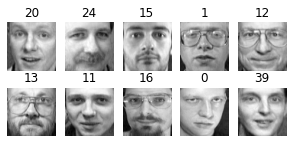

In [76]:
# Plotting the test data before autoencoding
inv_x_test_10 = pca.inverse_transform(x_test[:10])
print('Original test data')
plot_faces(inv_x_test_10, y_test[:10], n_cols=5)

Autoencoded test data


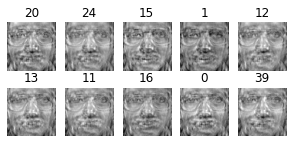

In [79]:
# Plotting the test data after autoencoding
autoenc_test_10 = model.predict(x_test[:10])
autoenc_inv_x_test_10 = pca.inverse_transform(autoenc_test_10)
print('Autoencoded test data')
plot_faces(autoenc_inv_x_test_10, y_test[:10], n_cols=5)